In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [ ]:
import pandas as pd

In [ ]:
#converting  data from Sckit learn to pandas
df = pd.DataFrame(data= dataset.data, columns= dataset.feature_names)

In [ ]:
# using sk-learn dictionary
print("How many features do we have in this dataset?",len(dataset.feature_names))
print("How many observations have a 'mean area' of greater than 700?",len(dataset.data[dataset.data[:,3] > 700])) # because main_area is the third feature
print("How many participants tested Malignant? ",len(dataset.target[dataset.target <=0])) # beacuse target malignant is 0
print("How many participants tested Benign? ",len(dataset.target[dataset.target >0])) # beacuse target benign is 1


How many features do we have in this dataset? 30
How many observations have a 'mean area' of greater than 700? 171
How many participants tested Malignant?  212
How many participants tested Benign?  357


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.3, random_state=0)

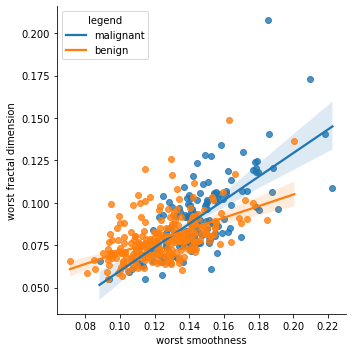

In [ ]:
# Use seaborn.lmplot (help here) to visualize a few features of the training set. Draw a plot where the x-axis is worst smoothness, the y-axis is worst fractal dimension, and the color of each datapoint indicates its class. [0.5]


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#coverting training data from Sckit learn to pandas so that it can be plotted on seaborn
dataset_pd = pd.DataFrame(data= np.c_[X_train, y_train], columns= np.append(dataset.feature_names,['target']))

seaborn_plot = sns.lmplot(x="worst smoothness", y="worst fractal dimension", hue="target", data=dataset_pd,legend=False)

#adding legend to the colours
plt.legend(title='legend', labels=['malignant', 'benign'])
plt.show(seaborn_plot)

#plot using seaborn.lmplot with color code for each of the cancer classes. 0 means malignant and 1 means benign
#sns.lmplot(x="worst smoothness", y="worst fractal dimension", hue="target", data=dataset_pd)


In [ ]:
#Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again.


import matplotlib.pyplot as plt

#get info about the different features
dataset_pd.describe()
# I will choose 'mean perimeter' and 'smoothness error' as the two features because they have very different scales.




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,14.185500,19.192839,92.335503,661.859045,0.096475,0.104080,0.088794,0.049479,0.180698,0.062646,0.409096,1.204458,2.866619,41.384364,0.006984,0.025099,0.031226,0.011678,0.020402,0.003735,16.359621,25.534523,107.736030,894.246985,0.132529,0.253369,0.268531,0.115221,0.289187,0.083718,0.625628
std,3.598618,4.190476,24.769334,366.558262,0.013916,0.051031,0.078154,0.039216,0.028057,0.006861,0.293965,0.551973,2.109921,49.830675,0.002861,0.016835,0.028576,0.005862,0.008181,0.002638,4.965170,6.147466,34.460647,597.853882,0.022989,0.153653,0.193250,0.065688,0.063439,0.017957,0.484569
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.362800,0.757000,7.228000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.710000,16.032500,75.310000,420.350000,0.086740,0.066805,0.030385,0.020710,0.161525,0.057685,0.232325,0.828050,1.596250,17.850000,0.005180,0.013628,0.016055,0.007932,0.014950,0.002238,13.052500,20.865000,84.122500,516.425000,0.116300,0.148600,0.119100,0.065320,0.247850,0.071462,0.000000
50%,13.310000,18.725000,86.140000,548.450000,0.096035,0.094035,0.062650,0.033870,0.179150,0.061715,0.321750,1.080000,2.230000,24.190000,0.006266,0.020500,0.026245,0.010800,0.018610,0.003110,14.915000,25.155000,97.455000,682.000000,0.132250,0.216000,0.229850,0.098855,0.280950,0.080075,1.000000
75%,15.772500,21.597500,104.475000,779.125000,0.105400,0.128750,0.128775,0.075022,0.195400,0.065735,0.474900,1.464500,3.295750,45.120000,0.008161,0.032060,0.040000,0.014417,0.022937,0.004502,19.005000,29.452500,125.775000,1093.250000,0.145275,0.328975,0.378750,0.161300,0.318275,0.091852,1.000000
max,28.110000,33.810000,188.500000,2501.000000,0.144700,0.311400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.023330,0.106400,0.396000,0.052790,0.061460,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.105000,0.290300,0.663800,0.207500,1.000000


Text(0.5, 0.98, 'STANDARDIZED PLOT')

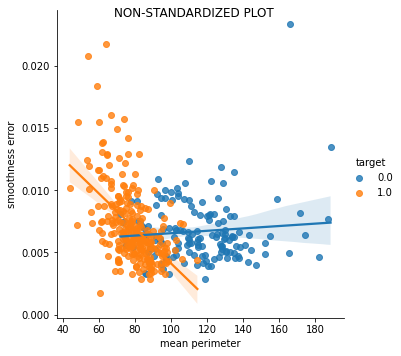

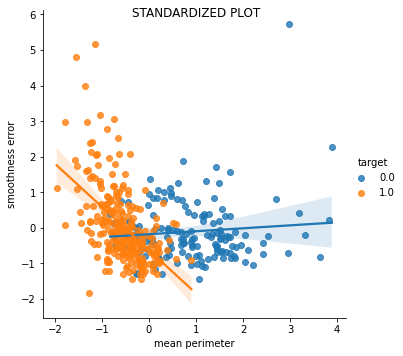

In [ ]:
# As shown from dataset_pd.describe(), the range of 'mean perimeter' is min= 43.79 and max = 188.5, while the range of 'smoothness error' is min= 0.0017 and max = 0.023
sns.lmplot(x="mean perimeter", y="smoothness error", hue="target", data=dataset_pd).fig.suptitle("NON-STANDARDIZED PLOT")

# mean perimeter col is index 2 and smoothness error col is index 14 so to get the training set to standardize do as follows
X_train_std_prep = X_train[:,(2,14)]

# Standardization of breast cancer dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train_std_prep)
X_train_std=scaler.transform(X_train_std_prep)

#confirm that standard dev and mean are ~ 1 and 0 respectively -- CONFIRMED
#print(X_train_std.std())
#print(X_train_std.mean())

#convert the selected X_train subset to pandas dataframe
dataset_pd_std = pd.DataFrame(data= np.c_[X_train_std, y_train], columns= ['mean perimeter']+['smoothness error']+['target'])

sns.lmplot(x="mean perimeter", y="smoothness error", hue="target", data=dataset_pd_std).fig.suptitle("STANDARDIZED PLOT")


In [ ]:

#Question 1:
from sklearn import neighbors
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

mean_val_score = np.empty((100,2)) # mean validation accuracy
mean_train_score = np.empty((100,2)) # mean training accuracy
for i in range(1,101): # sweeping from 1 to 100 k's because 101 is not inclusive
  knn = neighbors.KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  scores = cross_validate(knn, X_train, y_train, cv=5,return_train_score=True)
  #mean validation score
  mean_val_score[i-1]=[i,scores['test_score'].mean()]
  #mean train score
  mean_train_score[i-1]=[i,scores['train_score'].mean()]



Text(0, 0.5, 'mean validation score')

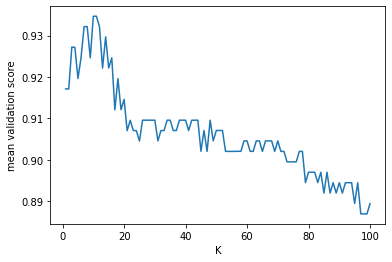

In [ ]:
plt.plot(mean_val_score[:,0],mean_val_score[:,1])
plt.xlabel("K")
plt.ylabel("mean validation score")

In [ ]:
#Question 2

#best k
indices=np.where(mean_val_score==max(mean_val_score[:,1]))
row_indices=indices[0]

#best k happens at the following 2 k's:
best_k=mean_val_score[np.where(mean_val_score==max(mean_val_score[:,1]))[0]]

print("highest cross validation accuracy is: ",best_k[1,1])
print("best cross validation accuracy happens at the following 2 k's: ",best_k[:,0])

highest cross validation accuracy is:  0.9346518987341772
best cross validation accuracy happens at the following 2 k's:  [10. 11.]


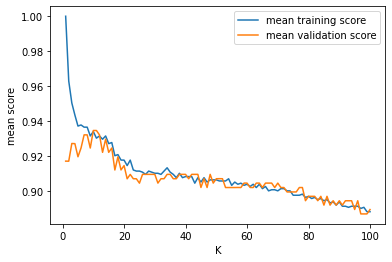

In [ ]:
#Question 3
plt.plot(mean_train_score[:,0],mean_train_score[:,1],label = "mean training score")
plt.plot(mean_val_score[:,0],mean_val_score[:,1],label = "mean validation score")
plt.xlabel("K")
plt.ylabel("mean score")
plt.legend()

In [ ]:
from sklearn import tree




def Feature_selector (X_train , y_train , tr=0.95):


  features_removed =[]
  best_k_part3 =[]
  best_mean_val_score_part3 =[]
  feature_count_orig= len(X_train.columns)

  #continue through each of the features to evaluate whether needed or not until one of the stop conditions is met
  for j in range(0,feature_count_orig):
    #fit tree
    model = tree.DecisionTreeClassifier()
    model.fit(X_train, y_train)

    #Extracts the feature importance
    importance = model.feature_importances_

    # remove the feature with lowest importance. If multiple have the same importance, remove the first one
    lowest_importance_ind = np.where(importance == np.amin(importance))[0] #index or indices of lowest importance features

    #store feature removed
    features_removed.append(X_train.columns[lowest_importance_ind[0]])

    #remove feature from X_train and importance
    X_train.drop(X_train.columns[lowest_importance_ind[0]], inplace=True, axis=1)
    #X_train=np.delete(X_train, lowest_importance_ind[0],1)

    # initialize for k tuning
    mean_val_score_part3 = np.empty((100,2))

    # sweep through k = 1 to 100
    for i in range(1,101):

      #Then, a KNN model is trained on the remaining features. The number of neighbors (k) for each KNN model should be tuned using a 5-fold cross-validation.
      knn_part3 = neighbors.KNeighborsClassifier(n_neighbors=i)
      knn_part3.fit(X_train, y_train) # with new x_train with 1 feature reoved based on importance
      scores_part3 = cross_validate(knn_part3, X_train, y_train, cv=5,return_train_score=True)
      #mean validation score across 5 folds in cv
      mean_val_score_part3[i-1]=[i,scores_part3['test_score'].mean()]

    #Store the best mean cross-validation score and the corresponding k (number of neighbours) value in two lists.
    #best k happens at the following k (if multiple k's have the highest score, then choose the first one):
    best_k_part3.append(mean_val_score_part3[np.where(mean_val_score_part3==max(mean_val_score_part3[:,1]))[0]][0,0])
    best_mean_val_score_part3.append(max(mean_val_score_part3[:,1]))

    #stop cond 1: 1 feature remaining
    if len(X_train.columns) ==1:
      break
    #stop cond 2
    elif best_mean_val_score_part3[j] < tr * full_feature_cv:
      break


  return features_removed,best_mean_val_score_part3,best_k_part3


#converting the entire training data from Sckit learn to pandas
X_train_pd = pd.DataFrame(data= X_train, columns= dataset.feature_names)

# from part 2 best cross validation accuracy for when the full feature list is used for KNN is as follows
full_feature_cv = best_k[0][1]  # best_k[0][1] is from part 2

result=Feature_selector(X_train_pd, y_train)
print(result)

(['mean radius', 'mean texture', 'mean perimeter', 'mean smoothness', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'texture error', 'mean fractal dimension', 'perimeter error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'worst perimeter', 'worst smoothness', 'worst fractal dimension', 'worst radius', 'worst compactness', 'fractal dimension error', 'radius error', 'worst texture', 'mean symmetry', 'worst symmetry', 'worst concavity', 'area error', 'worst area'], [0.9346518987341772, 0.9346518987341772, 0.9321518987341773, 0.9321518987341773, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145569620253164, 0.9145569620253164, 0.9145569620253164, 0.9145569620253164, 0.9145569620253164, 0.9145569620253164, 0.914

Text(0, 0.5, 'mean cross validaion accuracy')

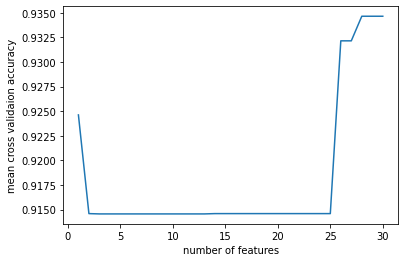

In [ ]:
#Visualize your results by plotting the mean cross-validation accuracy (with a tuned k on y axis) vs. the number of features (x axis).
#This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. [0.5]
result_to_plot_cv=[]

#result[1] is the best_mean_val_score_part3 list. It is in decreasing order of number of features. Starts with 29 features
result_to_plot_cv=result[1].copy()

result_to_plot_cv.insert(0,full_feature_cv) # add the cv of when number of features is 30 (full set)

plt.plot(list(reversed(range(1,len(result_to_plot_cv)+1))),result_to_plot_cv)
plt.xlabel("number of features")
plt.ylabel("mean cross validaion accuracy")


Text(0, 0.5, 'best value of k')

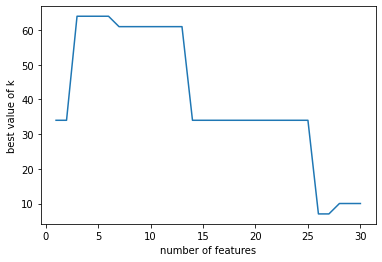

In [ ]:
#Plot the best value of k (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.

result_to_plot_k=[]

#result[1] is the best_mean_val_score_part3 list. It is in decreasing order of number of features. Starts with 29 features
result_to_plot_k=result[2].copy()

result_to_plot_k.insert(0,best_k[0,0]) # add the cv of when number of features is 30 (full set). If mul;tiple k's have the best cv then choose the first one

plt.plot(list(reversed(range(1,len(result_to_plot_k)+1))),result_to_plot_k)
plt.xlabel("number of features")
plt.ylabel("best value of k")


In [ ]:

# mean perimeter col is index 2 and smoothness error col is index 14 so to get the training set to standardize do as follows

# Standardization of breast cancer dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#standardize test data
scaler.fit(X_train)
X_train_stand=scaler.transform(X_train)

# check mean and std and approx. 0 and 1 respectively
#print(X_train_stand.mean())
#print(X_train_stand.std())

#standardize test data
X_test_stand=scaler.transform(X_test)

# check mean and std and approx. 0 and 1 respectively
#print(X_test_stand.mean())
#print(X_test_stand.std())



In [ ]:
# convert standardized X_traing to pandas dataframe
X_train_stand_pd = pd.DataFrame(data= np.c_[X_train_stand], columns= dataset.feature_names)

#Call your Feature_selector function on the standardized training data with a threshold of 0.95%.
result_stand=Feature_selector(X_train_stand_pd,y_train,0.95)

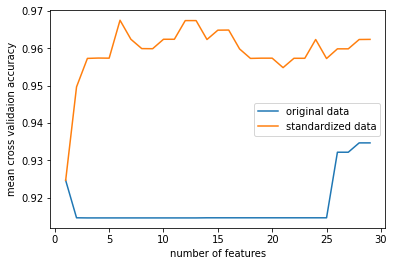

In [ ]:
#plotting cv of orig data
plt.plot(list(reversed(range(1,len(result[1])+1))),result[1], label = "original data")
#plotting cv of standardized data
plt.plot(list(reversed(range(1,len(result_stand[1])+1))),result_stand[1], label="standardized data")
plt.xlabel("number of features")
plt.ylabel("mean cross validaion accuracy")
plt.legend()


In [ ]:
print("max cv accuracy with the standardized data is:", max(result_stand[1]))
print("max cv accuracy with the standardized data happens k is:", result_stand[2][result_stand[1].index(max(result_stand[1]))])
print("max cv accuracy with the standardized data occurs when those features are removed:",result_stand[0][:result_stand[1].index(max(result_stand[1]))+1])
#result_stand[1].index(max(result_stand[1]))
print("The number of features present for max cv is:" , len(list(set(dataset.feature_names)-set(result_stand[0][:result_stand[1].index(max(result_stand[1]))+1]))))

print("max cv accuracy with the standardized data occurs when those features are present:",list(set(dataset.feature_names)-set(result_stand[0][:result_stand[1].index(max(result_stand[1]))+1])))

max cv accuracy with the standardized data is: 0.9675
max cv accuracy with the standardized data happens k is: 8.0
max cv accuracy with the standardized data occurs when those features are removed: ['mean texture', 'mean perimeter', 'mean radius', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean fractal dimension', 'texture error', 'perimeter error', 'compactness error', 'concavity error', 'smoothness error', 'symmetry error', 'concave points error', 'worst smoothness', 'worst radius', 'worst compactness', 'worst perimeter', 'radius error', 'worst fractal dimension', 'fractal dimension error', 'mean symmetry']
The number of features present for max cv is: 6
max cv accuracy with the standardized data occurs when those features are present: ['worst symmetry', 'worst texture', 'worst concavity', 'area error', 'worst concave points', 'worst area']


In [ ]:
print("max cv accuracy with the standardized data happens k is:", result_stand[2][result_stand[1].index(max(result_stand[1]))])
print("The number of features present for max cv is:" , len(list(set(dataset.feature_names)-set(result_stand[0][:result_stand[1].index(max(result_stand[1]))+1]))))
print("max cv accuracy with the standardized data occurs when those features are present:",list(set(dataset.feature_names)-set(result_stand[0][:result_stand[1].index(max(result_stand[1]))+1])))

max cv accuracy with the standardized data happens k is: 8.0
The number of features present for max cv is: 6
max cv accuracy with the standardized data occurs when those features are present: ['worst symmetry', 'worst texture', 'worst concavity', 'area error', 'worst concave points', 'worst area']


In [ ]:
#convert standardized X_test to dataframe

X_test_stand_pd = pd.DataFrame(data= X_test_stand, columns= dataset.feature_names)

# select only the features that are in the best performing model (that remained after the feature selector ran)
X_test_stand_pd[set(dataset.feature_names)-set(result_stand[0][:result_stand[1].index(max(result_stand[1]))+1])]

,worst symmetry,worst texture,worst concavity,area error,worst concave points,worst area
0,1.093961,0.671930,1.254202,-0.155006,1.369985,-0.083481
1,-0.706868,1.416262,-0.671121,-0.478306,-0.840956,-0.437692
2,-1.192981,-1.013809,-1.066963,-0.444751,-0.503942,-0.343906
3,-0.403836,-0.044712,-0.580451,-0.418429,-0.608507,-0.124848
4,-1.428146,-0.443752,-1.140898,-0.547025,-0.992163,-0.583396
...,...,...,...,...,...,...
166,0.480006,0.424363,-0.003786,0.192405,0.615475,0.004611
167,0.265359,-0.020281,0.319001,0.169298,1.252616,0.761600
168,-0.067660,0.015551,-0.388747,-0.300079,0.200876,-0.322134
169,-0.402258,0.597009,-0.763346,-0.409989,-0.900555,-0.457287


In [ ]:


from sklearn.metrics import accuracy_score

# convert standardized X_traing to pandas dataframe
X_train_stand_pd_part5 = pd.DataFrame(data= X_train_stand, columns= dataset.feature_names)

#recreate best model using the training data and the best k
knn_part5 = neighbors.KNeighborsClassifier(int(result_stand[2][result_stand[1].index(max(result_stand[1]))]))

#use only the features included
knn_part5.fit(X_train_stand_pd_part5[set(dataset.feature_names)-set(result_stand[0][:result_stand[1].index(max(result_stand[1]))+1])], y_train)


val_predicted = knn_part5.predict(X_test_stand_pd[set(dataset.feature_names)-set(result_stand[0][:result_stand[1].index(max(result_stand[1]))+1])])

accuracy = accuracy_score(y_test, val_predicted)
print ("Test set accuracy: ", accuracy * 100, "%")




Test set accuracy:  93.56725146198829 %
